## Data Loading

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/IT24102955/AI-ML-Project/refs/heads/main/data/raw/Credit_card.csv')
data_label=pd.read_csv('https://raw.githubusercontent.com/IT24102955/AI-ML-Project/refs/heads/main/data/raw/Credit_card_label.csv')

In [4]:
# converting extracted csv files into pandas DataFrame object
data_df=pd.DataFrame(data)
data_lable_df=pd.DataFrame(data_label)

In [5]:
# attaching label target labels to data_df DataFrame
data_df['target']=data_lable_df['label']

In [7]:
data_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,target
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
# converting the target variable: 0->is application approved and 1->application rejected
target_np=np.where(data_df['target']==0,'Approved','Rejected')

In [10]:
# attaching the converted target column to the main DataFrame
data_df['target']=target_np

In [11]:
data_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,target
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,Rejected
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,Rejected
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,Rejected
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,Rejected
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,Rejected


In [12]:
# dropping Ind_ID because it is not useful for prediction
data_df.drop('Ind_ID',axis=1,inplace=True)

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1525 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Birthday_count   1526 non-null   float64
 10  Employed_days    1548 non-null   int64  
 11  Mobile_phone     1548 non-null   int64  
 12  Work_Phone       1548 non-null   int64  
 13  Phone            1548 non-null   int64  
 14  EMAIL_ID         1548 non-null   int64  
 15  Type_Occupation  1060 non-null   object 
 16  Family_Members   1548 non-null   int64  
 17  target        

In [14]:
# shape of the dataset
print(f"'Number of rows: {data_df.shape[0]},\n Number of columns(including target variable): {data_df.shape[1]}")

'Number of rows: 1548,
 Number of columns(including target variable): 18


In [15]:
# columns of the dataset
print(f"Columns of the dataset:\n{data_df.columns}")

Columns of the dataset:
Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'target'],
      dtype='object')


In [16]:
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features=data_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Features: {numerical_features}")
print(f"\nCategorical Features: {categorical_features}")

Numerical Features: ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members']

Categorical Features: ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation', 'target']


In [17]:
data_df.describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [18]:
# information of categorical variables
for col in categorical_features:
  print(data_df[col].value_counts())
  print()

GENDER
F    973
M    568
Name: count, dtype: int64

Car_Owner
N    924
Y    624
Name: count, dtype: int64

Propert_Owner
Y    1010
N     538
Name: count, dtype: int64

Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

EDUCATION
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64

Marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: count, dtype: int64

Housing_type
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64

Type_Occupation
Laborers                 268
Core staff    

In [19]:
# information of target variable
data_df.target.value_counts()

,count
target,
Approved,1373
Rejected,175


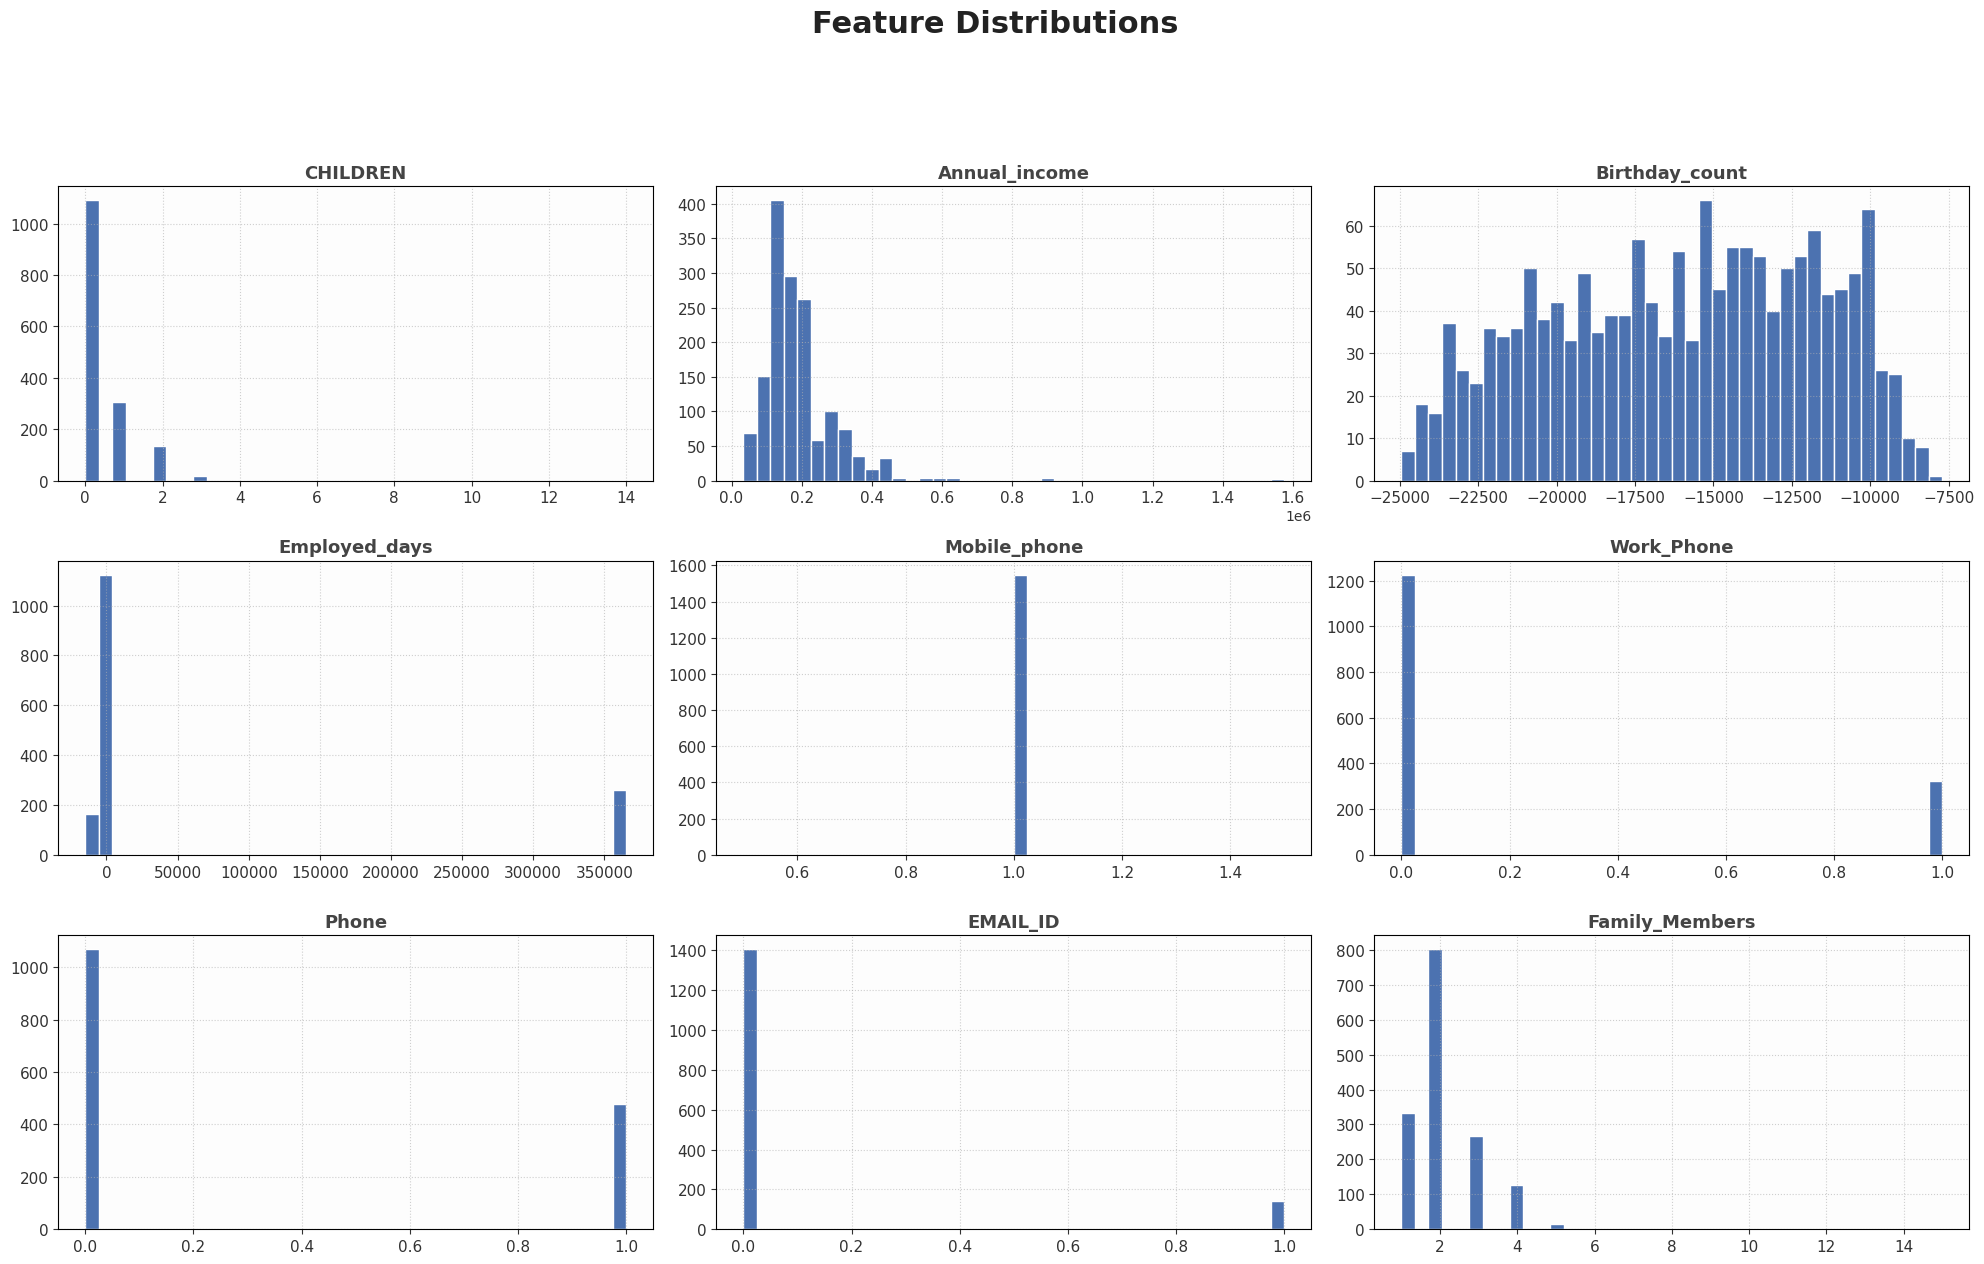

In [20]:
# visualising the numerical feature distribution
ax = data_df.hist(
    bins=40,
    figsize=(20, 12),
    color='#4C72B0',       # elegant blue
    edgecolor='white',     # softer contrast
    grid=False
)

for a in ax.ravel():
    # Light background
    a.set_facecolor("#fdfdfd")

    # Subtle gridlines
    a.grid(True, linestyle=':', alpha=0.6)

    # Axis labels
    a.tick_params(axis='x', labelsize=11, colors="#333333")
    a.tick_params(axis='y', labelsize=11, colors="#333333")

    # Bold titles with custom color
    a.set_title(a.get_title(), fontsize=13, fontweight='semibold', color="#444444")

# Main title
plt.suptitle("Feature Distributions", fontsize=22, fontweight='bold', color="#222222", y=1.05)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

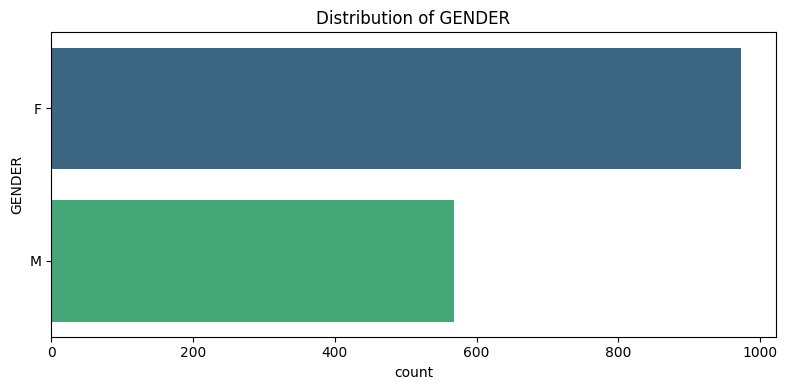

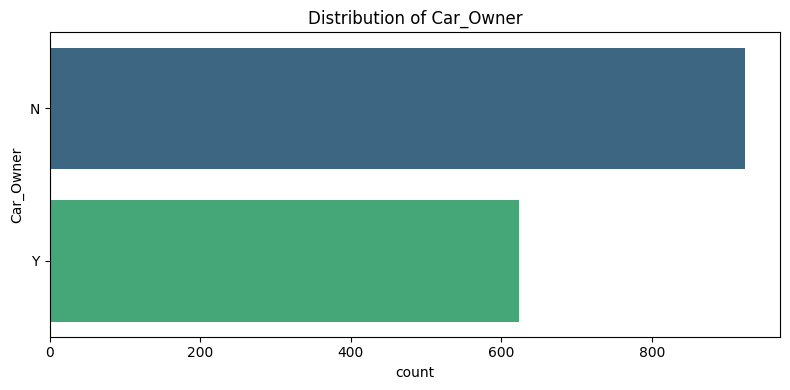

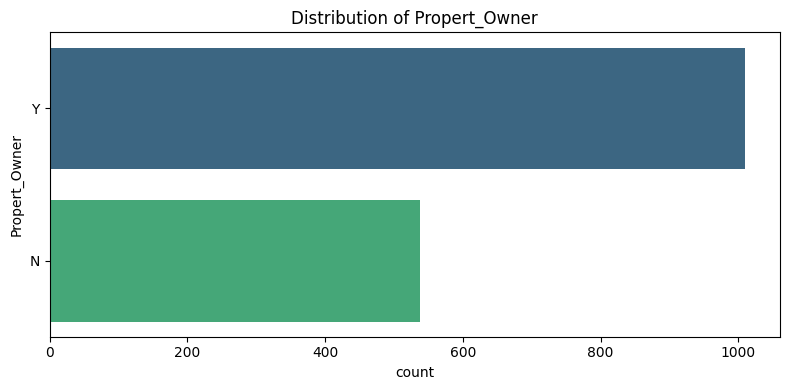

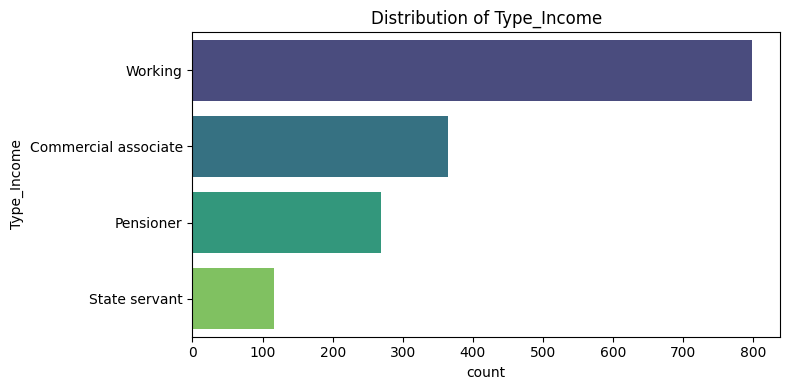

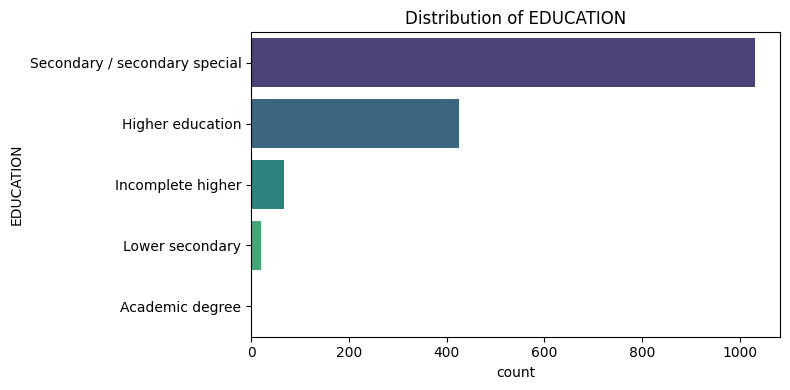

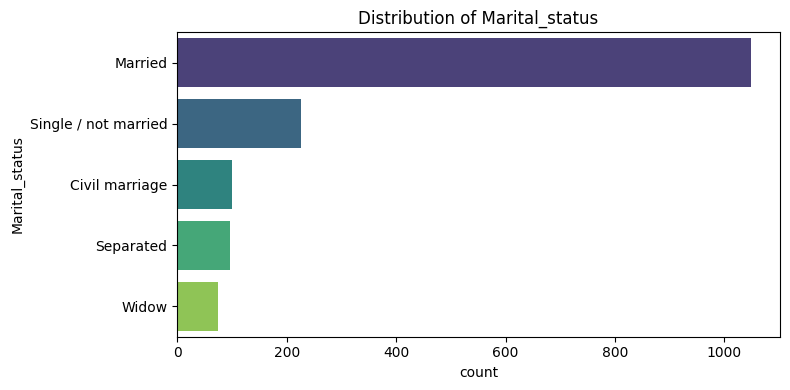

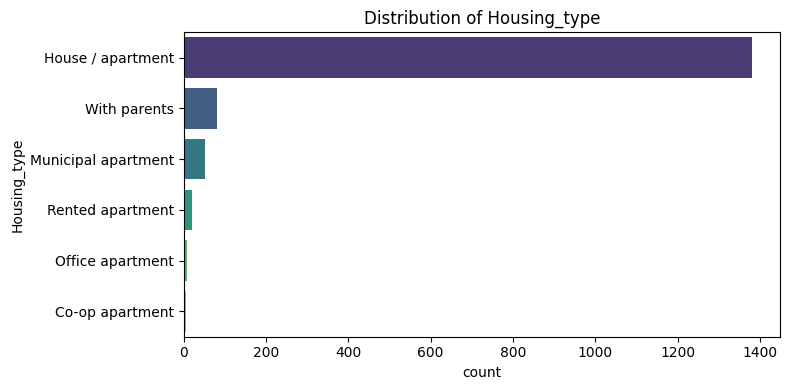

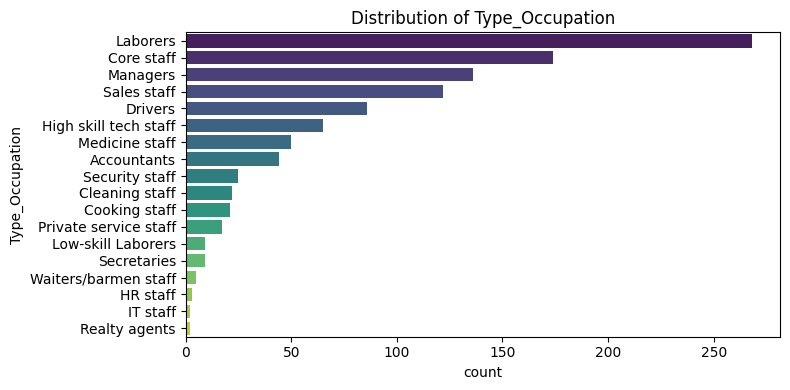

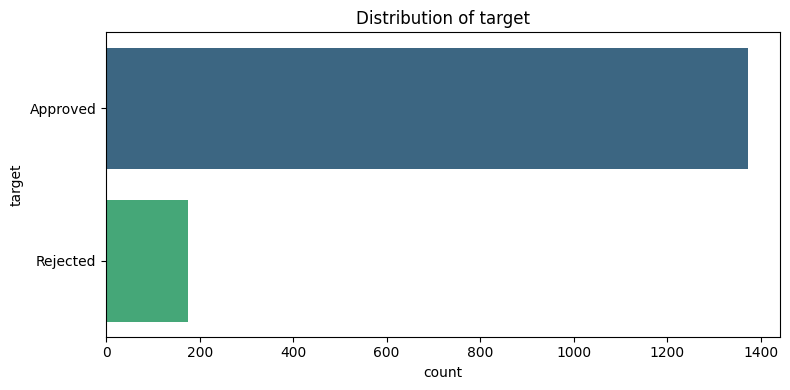

In [21]:
# visualising the categorical feature distribution
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data_df, order=data_df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

##Handling Missing Data

In [22]:
# Identifying the missing Data
print(f"Identifying the missing data: \n{data_df.isnull().sum()}")

Identifying the missing data: 
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
target               0
dtype: int64


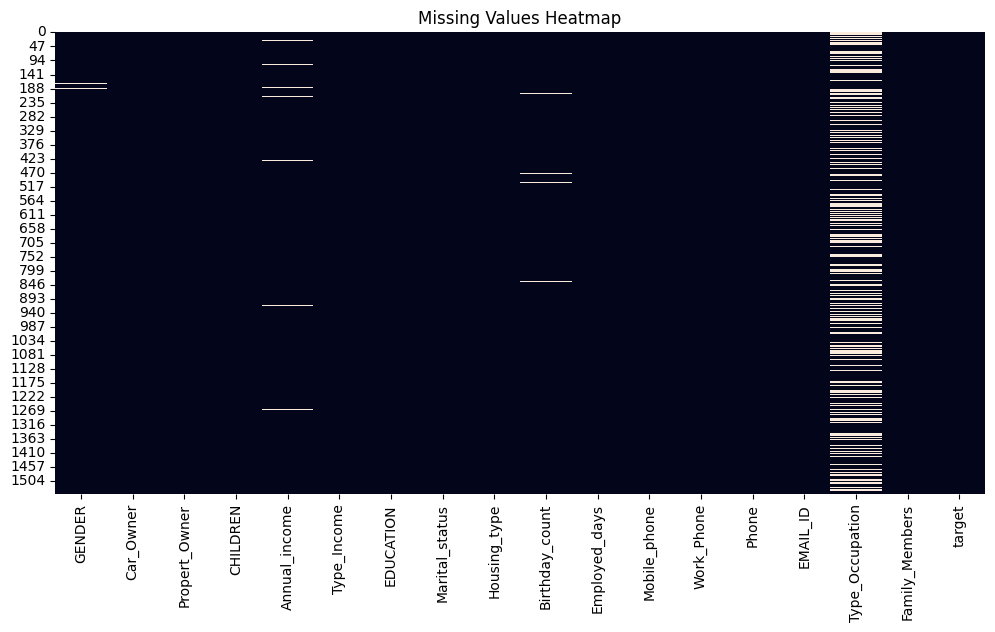

Type_Occupation    488
Annual_income       23
Birthday_count      22
GENDER               7
dtype: int64


In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data_df.isnull(),cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


missing_counts=data_df.isnull().sum().sort_values(ascending=False)
print(missing_counts[missing_counts>0])

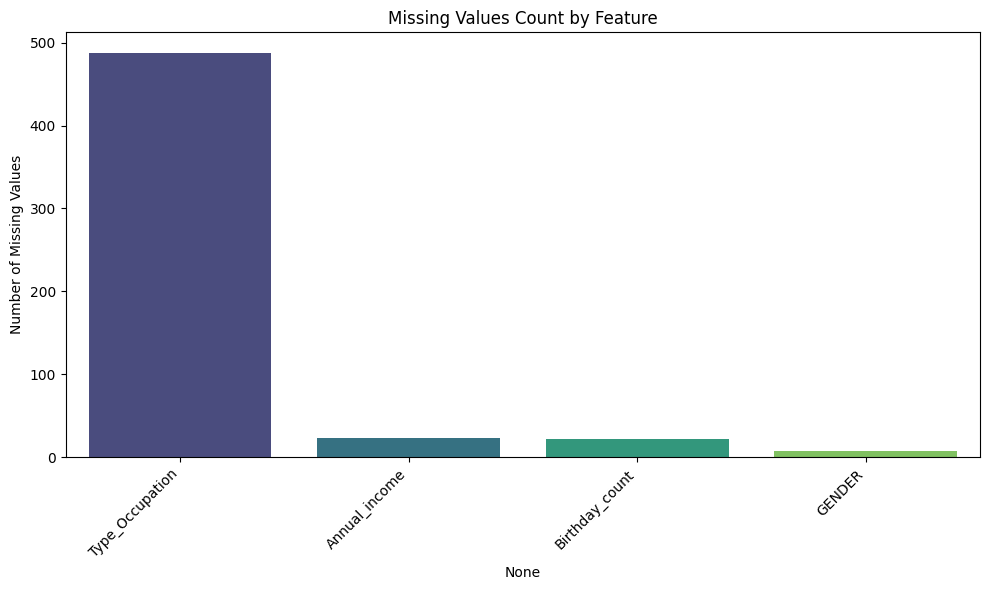

In [24]:
missing_counts = data_df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)


if len(missing_cols) == 0:
    print("No missing values in the dataset!")
else:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_cols.index, y=missing_cols.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values Count by Feature')
    plt.tight_layout()
    plt.show()

In [25]:
missing_columns=[]
for col in data_df.columns.tolist():
  if data_df[col].isnull().any():
    missing_columns.append(col)
print(missing_columns)

['GENDER', 'Annual_income', 'Birthday_count', 'Type_Occupation']


In [26]:
print(data_df[missing_columns].dtypes)

GENDER              object
Annual_income      float64
Birthday_count     float64
Type_Occupation     object
dtype: object


In [27]:
missing_numerical_features=data_df[missing_columns].select_dtypes(include=[np.number]).columns.tolist()
missing_categorical_features=data_df[missing_columns].select_dtypes(include=['object']).columns.tolist()
print(f"categorical columns with missing values: \n{missing_categorical_features}")
print(f"\nNumerical columns withr missing values: \n{missing_numerical_features}")

categorical columns with missing values: 
['GENDER', 'Type_Occupation']

Numerical columns withr missing values: 
['Annual_income', 'Birthday_count']


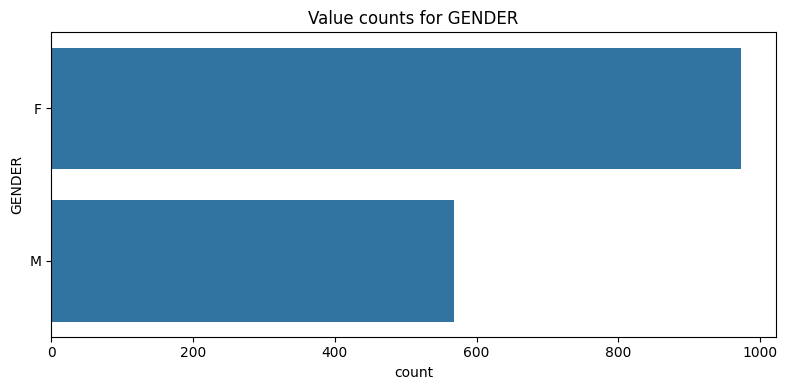

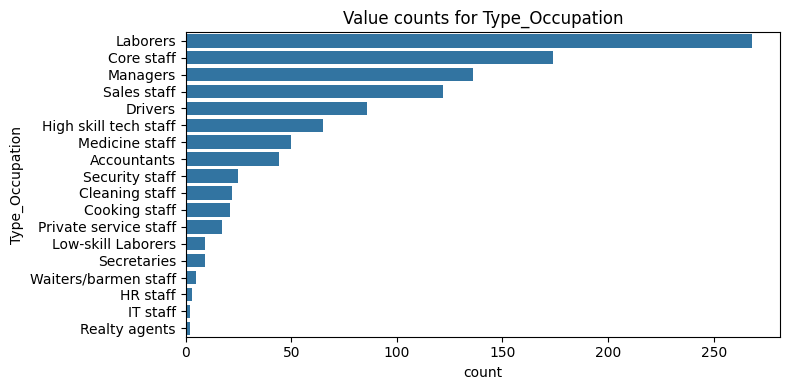

In [28]:
for col in missing_categorical_features:
  plt.figure(figsize=(8,4))
  sns.countplot(y=col,data=data_df,order=data_df[col].value_counts().index)
  plt.title(f"Value counts for {col}")
  plt.tight_layout()
  plt.show()

In [29]:
data_df.shape

(1548, 18)

In [30]:
# here we are dropping the whole Type_Occupation because it contains 488 missing values and we can cover this column considering income and type_income
data_df.drop('Type_Occupation',axis=1,inplace=True)

In [31]:
# also dropping the birthday count column because it is not usefull for prediction
data_df.drop('Birthday_count',axis=1,inplace=True)

In [32]:
data_df.shape

(1548, 16)

In [33]:
data_df.isnull().sum()

,0
GENDER,7
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0
Employed_days,0


In [34]:
# for missing 7 values in gender column we are going to remove those rows containing missing values
data_df.dropna(subset=['GENDER'],inplace=True)

In [35]:
data_df.shape

(1541, 16)

##Using model based imputation to predict the missing values for annual income


In [36]:
temp_data=pd.DataFrame(data_df['Type_Income'])
temp_data['target']=data_df['Annual_income']

In [37]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False)
one_hot_data=onehot.fit_transform(temp_data[['Type_Income']])

In [38]:
new_dataframe=pd.DataFrame(one_hot_data,columns=onehot.categories_)

In [39]:
new_dataframe['target']=data_df['Annual_income']

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

ran_forest=RandomForestRegressor(random_state=42)

In [41]:
imputer=IterativeImputer(estimator=ran_forest,random_state=42)
new_dataframe=imputer.fit_transform(new_dataframe)

In [42]:
data_df['Annual_income'] = new_dataframe[:, -1]

In [43]:
missing_counts = data_df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)


if len(missing_cols) == 0:
    print("No missing values in the dataset!")
else:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_cols.index, y=missing_cols.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values Count by Feature')
    plt.tight_layout()
    plt.show()

No missing values in the dataset!


In [44]:
data_df.to_csv('IT24102955.csv',index=False)